# Autocomplete

## Preparation

In [1]:
# prepare the required modules
!pip install seaborn

In [45]:
"""Run these line to load the available datasets"""
import json

# load data test pure
with open('test_autocomplete_pure.json', 'r') as fp:
    testwords = json.load(fp)
    
# load data test with typo
with open('test_autocomplete_typo.json', 'r') as fp:
    test_1typo = json.load(fp)

In [46]:
# method to populate experiment result
def getAutoCompleteData(url, file, datatest, method, dataname):
    import requests
    from time import time
    start = time()
    results = {}
    
    for word in datatest:
        start_in = time()
        response = requests.get(url+word.strip())
        results[word] = [method, dataname, response.json(), len(response.json()), len(word), time()-start_in]
        
    print((time()-start)/len(datatest), 'seconds')
    with open(file, 'w') as fp:
        json.dump(results, fp)
    return results

## Analysis

In [48]:
# testing fast-autocomplete
url = 'http://130.216.216.55/autocomplete?query='
results_pure_fa = getAutoCompleteData(url, 'results_pure_fa.json', testwords, 'fast', '0 typo')

0.01148000955581665 seconds


In [49]:
# testing SciGraph
url = 'http://130.216.216.55/autocomplete_sc?query='
results_pure_sc = getAutoCompleteData(url, 'results_pure_sc.json', testwords, 'SciGraph', '0 typo')

0.8254226553440094 seconds


In [50]:
# testing fast-autocomplete
url = 'http://130.216.216.55/autocomplete?query='
results_1typo_fa = getAutoCompleteData(url, 'results_1typo_fa.json', test_1typo, 'fast', '1 typo')

0.010964785814285278 seconds


In [51]:
# testing SciGraph
url = 'http://130.216.216.55/autocomplete_sc?query='
results_1typo_sc = getAutoCompleteData(url, 'results_1typo_sc.json', test_1typo, 'SciGraph', '1 typo')

0.8379882657527924 seconds


## Autocomplete Analysis

In [52]:
# Pure datatest fast-autocomplete vs SciGraph

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")


data = list(results_1typo_fa.values()) + list(results_pure_fa.values()) + list(results_pure_sc.values()) + list(results_1typo_sc.values())
df = pd.DataFrame(data, columns = ['method', 'dataname', 'returns', '# of return', '# of characters in a query', 'time (second)'])
df

,method,dataname,returns,# of return,# of characters in a query,time (second)
0,fast,1 typo,"[sinonasal, sinonasal papilloma, sinonasal und...",3,9,0.010025
1,fast,1 typo,"[acid, acid oxidase, acid oxidation, acid o-li...",10,8,0.008910
2,fast,1 typo,[chondrichthyes],1,14,0.010226
3,fast,1 typo,"[turbellarian, turbellarian platyhelminths]",2,12,0.008797
4,fast,1 typo,[rigb],1,5,0.008155
...,...,...,...,...,...,...
795,SciGraph,1 typo,[],0,7,0.866398
796,SciGraph,1 typo,[],0,3,0.832430
797,SciGraph,1 typo,[],0,6,0.826309
798,SciGraph,1 typo,[],0,9,0.827874


In [53]:
df['method & datatest'] = df['method'] + ' + ' + df['dataname']
df

,method,dataname,returns,# of return,# of characters in a query,time (second),method & datatest
0,fast,1 typo,"[sinonasal, sinonasal papilloma, sinonasal und...",3,9,0.010025,fast + 1 typo
1,fast,1 typo,"[acid, acid oxidase, acid oxidation, acid o-li...",10,8,0.008910,fast + 1 typo
2,fast,1 typo,[chondrichthyes],1,14,0.010226,fast + 1 typo
3,fast,1 typo,"[turbellarian, turbellarian platyhelminths]",2,12,0.008797,fast + 1 typo
4,fast,1 typo,[rigb],1,5,0.008155,fast + 1 typo
...,...,...,...,...,...,...,...
795,SciGraph,1 typo,[],0,7,0.866398,SciGraph + 1 typo
796,SciGraph,1 typo,[],0,3,0.832430,SciGraph + 1 typo
797,SciGraph,1 typo,[],0,6,0.826309,SciGraph + 1 typo
798,SciGraph,1 typo,[],0,9,0.827874,SciGraph + 1 typo


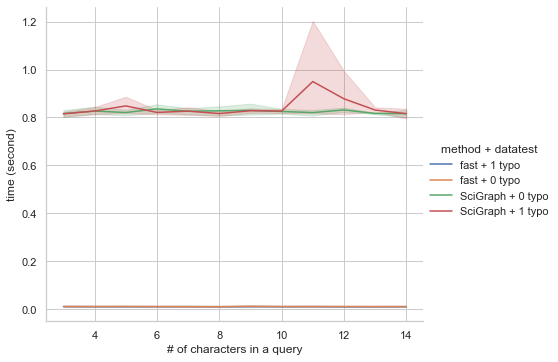

In [54]:
sns.set_style("whitegrid")
df['method + datatest'] = df['method'] + ' + ' + df['dataname']
sns.relplot(x="# of characters in a query", y="time (second)", hue="method + datatest", kind="line", data=df, height=5, aspect=6/5);
plt.savefig("execution_time.pdf", dpi=300)
plt.savefig("execution_time.png", dpi=300)

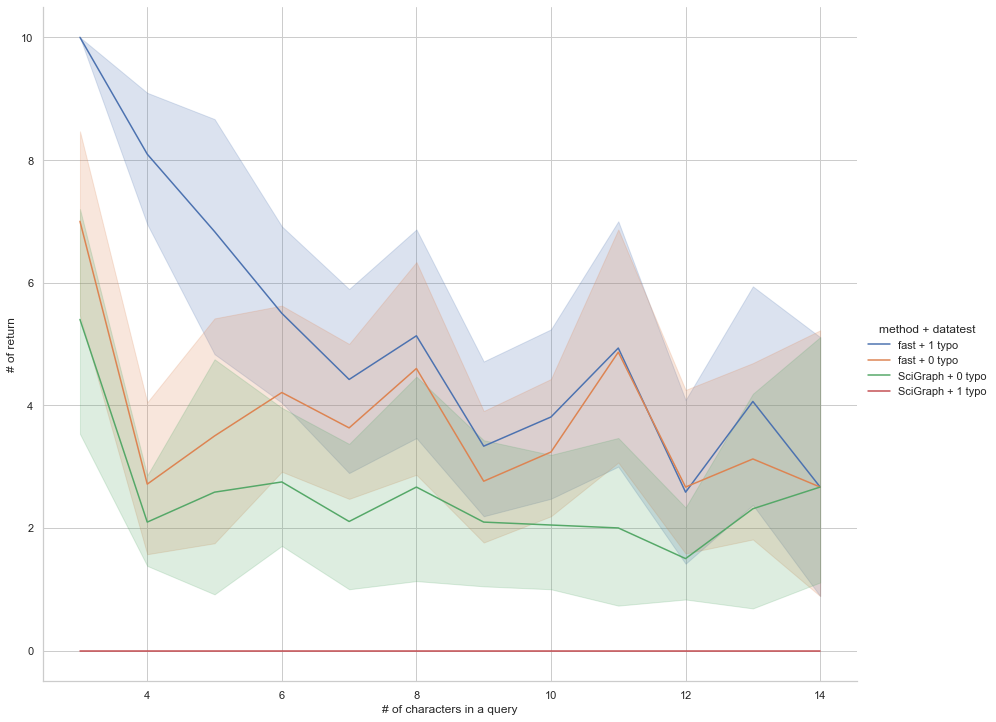

In [55]:
sns.set_style("whitegrid")
sns.relplot(x="# of characters in a query", y="# of return", hue="method + datatest", kind="line", data=df, height=10, aspect=12/10);
plt.savefig("return_number.pdf", dpi=300)
plt.savefig("return_number.png", dpi=300)

# Query performance

## Preparation

In [18]:
# load datatest
import json

with open('query_datatest.json', 'r') as fp:
    datatests = json.load(fp)
    
with open('author_datatest.json', 'r') as fp:
    datatests_author = json.load(fp)

In [180]:
# get dataset id with provided query
# using fuzzy search, for fields of:
# "organisms.primary.species.originalName",
# "item.keywords.keyword",
# "item.name",
# "item.description",
# "item.readme.description",
# "anatomy.organ.name"

query = {
    "size": 50,
    "from": 0,
    "query": {
        "multi_match": {
          "fields":  [ "organisms.primary.species.originalName",
                       "item.keywords.keyword",
                       "item.name",
                       "item.description",
                       "item.readme.description",
                       "anatomy.organ.name",
                       "contributors.last.name",
                       "contributors.first.name",
                       "contributors.name",
                     ],
          "query": "query keywords",
          "fuzziness": "AUTO"
            }
          },
        "_source":{
            "includes":["pennsieve.identifier"],
        }
  }

url = 'https://scicrunch.org/api/1/elastic/SPARC_PortalDatasets_pr/_search?api_key=6u6izfSzCHTqVvphJ28lUbAtX0nXGhrd'

def getESDataset(keyword):
    query['query']['multi_match']['query'] = keyword
    response = requests.post(url=url, json=query)
    dsList = []
    for hit in response.json()['hits']['hits']:
        try:
            dsList += [hit['_source']['pennsieve']['identifier']]
        except:
            pass
    return dsList

In [272]:
def getResults(datatest, approach):
    result = {}
    for term_num, d1 in datatest.items():
        result[term_num] = {}
        for typo, d2 in d1.items():
            result[term_num][typo] = {}
            print('\n getting the result of %s - %s using %s'%(term_num, typo, approach))
            for count, keyword in enumerate(d2):
                if keyword not in result[term_num][typo]:
                    if approach == 'AQUA':
                        result[term_num][typo][keyword] = getESDataset(getSpellCorrection(keyword))
                    elif approach == 'ES':
                        result[term_num][typo][keyword] = getESDataset(keyword)
                if count%20 == 0: print(count, end=' ')
    return result

## Get AQUA result

In [271]:
from symspellpy import SymSpell, Verbosity

def __loadSpellChecker():
    """
    Loading spelling checker n-gram model to symspellpy
    """
    from symspellpy import SymSpell, Verbosity
    max_edit_distance_dictionary = 3
    prefix_length = 6
    sym_spell = SymSpell(max_edit_distance_dictionary, prefix_length)
    sym_spell.load_pickle('_spell_model_ds')
    return sym_spell



# get symspellpy pipeline
sym_spell = __loadSpellChecker()

def getSpellCorrection(query):
    return sym_spell.word_segmentation(query).corrected_string

### Keyword as query

In [313]:
# get results using AQUA where the key is keywords
aqua_result = getResults(datatests, 'AQUA')


 getting the result of 1 - 0 typo using AQUA
0 20 40 
 getting the result of 1 - 1 del using AQUA
0 20 40 
 getting the result of 1 - 1 insert using AQUA
0 20 40 
 getting the result of 1 - 1 replace using AQUA
0 20 40 
 getting the result of 2 - 0 typo using AQUA
0 20 40 
 getting the result of 2 - 1 del using AQUA
0 20 40 
 getting the result of 2 - 1 insert using AQUA
0 20 40 
 getting the result of 2 - 1 replace using AQUA
0 20 40 
 getting the result of 2 - no space using AQUA
0 20 40 
 getting the result of 2 - no space 1 distance using AQUA
0 20 40 
 getting the result of 2 - no space 2 distance using AQUA
0 20 40 
 getting the result of 2 - no space 3 distance using AQUA
0 20 
 getting the result of 2 - 3 distance using AQUA
0 20 40 
 getting the result of 3 - 0 typo using AQUA
0 20 40 
 getting the result of 3 - 1 del using AQUA
0 20 40 
 getting the result of 3 - 1 insert using AQUA
0 20 40 
 getting the result of 3 - 1 replace using AQUA
0 20 40 
 getting the result of 3 - 

In [314]:
# save to json
with open('search_aqua_result.json', 'w') as fp:
    json.dump(aqua_result, fp)

In [31]:
# open json
with open('search_aqua_result.json', 'r') as fp:
    aqua_result = json.load(fp)

### Author as query

In [277]:
# get results using AQUA where the key is author
aqua_result_author = getResults(datatests_author, 'AQUA')


 getting the result of 1 - 0 typo using AQUA
0 20 40 
 getting the result of 1 - 1 del using AQUA
0 20 40 
 getting the result of 1 - 1 insert using AQUA
0 20 40 
 getting the result of 1 - 1 replace using AQUA
0 20 40 
 getting the result of 2 - 0 typo using AQUA
0 20 40 
 getting the result of 2 - 1 del using AQUA
0 20 40 
 getting the result of 2 - 1 insert using AQUA
0 20 40 
 getting the result of 2 - 1 replace using AQUA
0 20 40 
 getting the result of 2 - no space using AQUA
0 20 40 

In [212]:
# save to json
with open('search_aqua_result_author.json', 'w') as fp:
    json.dump(aqua_result_author, fp)

In [30]:
# open json
with open('search_aqua_result_author.json', 'r') as fp:
    aqua_result_author = json.load(fp)

## Get elasticsearch result

### Keyword as query

In [315]:
# get results using ES where the key is keywords
es_result = getResults(datatests, 'ES')


 getting the result of 1 - 0 typo using ES
0 20 40 
 getting the result of 1 - 1 del using ES
0 20 40 
 getting the result of 1 - 1 insert using ES
0 20 40 
 getting the result of 1 - 1 replace using ES
0 20 40 
 getting the result of 2 - 0 typo using ES
0 20 40 
 getting the result of 2 - 1 del using ES
0 20 40 
 getting the result of 2 - 1 insert using ES
0 20 40 
 getting the result of 2 - 1 replace using ES
0 20 40 
 getting the result of 2 - no space using ES
0 20 40 
 getting the result of 2 - no space 1 distance using ES
0 20 40 
 getting the result of 2 - no space 2 distance using ES
0 20 40 
 getting the result of 2 - no space 3 distance using ES
0 20 
 getting the result of 2 - 3 distance using ES
0 20 40 
 getting the result of 3 - 0 typo using ES
0 20 40 
 getting the result of 3 - 1 del using ES
0 20 40 
 getting the result of 3 - 1 insert using ES
0 20 40 
 getting the result of 3 - 1 replace using ES
0 20 40 
 getting the result of 3 - no space using ES
0 20 40 
 gettin

In [316]:
# save to json
with open('search_es_result.json', 'w') as fp:
    json.dump(es_result, fp)

In [33]:
# open json
with open('search_es_result.json', 'r') as fp:
    es_result = json.load(fp)

### Author as query

In [196]:
# get results using ES where the key is author
es_result_author = getResults(datatests_author, 'ES')


 getting the result of 1 - 0 typo using AQUA
0 20 40 
 getting the result of 1 - 1 del using AQUA
0 20 40 
 getting the result of 1 - 1 insert using AQUA
0 20 40 
 getting the result of 1 - 1 replace using AQUA
0 20 40 
 getting the result of 2 - 0 typo using AQUA
0 20 40 
 getting the result of 2 - 1 del using AQUA
0 20 40 
 getting the result of 2 - 1 insert using AQUA
0 20 40 
 getting the result of 2 - 1 replace using AQUA
0 20 40 
 getting the result of 2 - no space using AQUA
0 20 40 

In [ ]:
# save to json
with open('search_es_result_author.json', 'w') as fp:
    json.dump(es_result_author, fp)

In [28]:
with open('search_es_result_author.json', 'r') as fp:
    es_result_author = json.load(fp)

## Performance analysis

In [26]:
# change result to binary
import copy
def result2binary(datatest, result):
    result = copy.deepcopy(result)
    for term_num, d1 in result.items():
        for typo, d2 in d1.items():
            for keyword in d2:
                for count, idx in enumerate(d2[keyword]):
                    if idx in datatest[term_num][typo][keyword]:
                        d2[keyword][count] = 1
                    else:
                        d2[keyword][count] = 0
    return result

In [34]:
r_aqua = result2binary(datatests, aqua_result)
r_a_aqua = result2binary(datatests_author, aqua_result_author)
r_es = result2binary(datatests, es_result)
r_a_es = result2binary(datatests_author, es_result_author)

In [2]:
import pandas as pd
def compareMAP(results, names, originalData):
    # create dataframe
    numOfTerm = ['1 term', '2 terms', '3 terms']
    cols = pd.MultiIndex.from_product([numOfTerm, ['AQUA', 'ES']])
    index = pd.Index(['0 typo', '1 del', '1 insert', '1 replace', 'no space', 'no space 1 typo', 'no space 2 typo', 'no space 3 typo', '3 typo'])
    df = pd.DataFrame(columns=cols, index=index)
    df.index.name = 'Typo'
    
    # calculate map

    for term_num, d1 in results[0].items():
        for typo in d1:
            tot_ap = 0
            for keyword in results[0][term_num][typo]:
                value = 0
                for i in range(len( results[0][term_num][typo][keyword])):
                    if  results[0][term_num][typo][keyword][i] == 1:
                        value += sum( results[0][term_num][typo][keyword][:i+1])/(i+1)
                ap = 0 if sum( results[0][term_num][typo][keyword])==0 else value / len(originalData[str(term_num)][typo][keyword])
                tot_ap += ap
            tot_ap2 = 0
            for keyword in results[1][term_num][typo]:
                value = 0
                for i in range(len(results[1][term_num][typo][keyword])):
                    if results[1][term_num][typo][keyword][i] == 1:
                        value += sum(results[1][term_num][typo][keyword][:i+1])/(i+1)
                ap = 0 if sum(results[1][term_num][typo][keyword])==0 else value / len(originalData[str(term_num)][typo][keyword])
                tot_ap2 += ap

#             print(term_num, ';', typo, ';', tot_ap/len(results[0][term_num][typo]), ';', tot_ap2/len(results[1][term_num][typo]))
            plural = 's' if int(term_num)>1 else ''
            df.loc[typo][term_num + ' term' + plural][names[0]] = tot_ap/len(results[0][term_num][typo])
            df.loc[typo][term_num + ' term' + plural][names[1]] = tot_ap2/len(results[1][term_num][typo])
    return df

In [35]:
## Comparison of AQUA VS ES to keyword queries
df = compareMAP([r_aqua, r_es], ['AQUA', 'ES'], datatests)
df

1 term             2 terms             3 terms          
                     AQUA        ES      AQUA        ES      AQUA        ES
Typo                                                                       
0 typo           0.714785  0.711452  0.569673  0.569673  0.680431  0.677097
1 del            0.635935  0.677184  0.555371  0.505849  0.668609  0.653644
1 insert         0.704785  0.742356   0.56559  0.572663  0.680431  0.661312
1 replace        0.644126  0.772202  0.548968  0.568364  0.680431  0.646185
no space              NaN       NaN  0.568006  0.987667  0.667097  0.816667
no space 1 typo       NaN       NaN  0.559696  0.995918  0.670508  0.056122
no space 2 typo       NaN       NaN  0.484005  0.056667  0.644305  0.010204
no space 3 typo       NaN       NaN  0.446296  0.184211  0.589903  0.003472
3 typo                NaN       NaN  0.540761  0.481212  0.646919  0.621238

In [ ]:
print(df.to_latex())

In [ ]:
from tabulate import tabulate
print(tabulate(df, tablefmt="pipe", headers="keys"))

In [40]:
## Comparison of AQUA VS ES to author queries
df = compareMAP([r_a_aqua, r_a_es], ['AQUA', 'ES'], datatests_author)
df = df.dropna(axis=1, how='all')
df = df.dropna(how='all')
df

1 term             2 terms          
               AQUA        ES      AQUA        ES
Typo                                             
0 typo     0.863212  0.897673  0.926911  0.952778
1 del      0.613025  0.675974  0.818579  0.797889
1 insert   0.843871  0.914193  0.926944      0.96
1 replace  0.822374  0.867786  0.913039  0.913265
no space        NaN       NaN  0.926911    0.1245

In [ ]:
print(df.to_latex())

In [ ]:
print(tabulate(df, tablefmt="pipe", headers="keys"))